In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from missing_values import *
from IPython.display import display
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.float_format', lambda x: '%.3f'%x)
path = '/Users/barganor/Downloads/XY_train (1).csv'

data = pd.read_csv(path)
data.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,13163,city_16,0.910,NaN,No relevent experience,no_enrollment,High School,NaN,2,NaN,NaN,never,16,1
1,9357,city_136,0.897,Male,Has relevent experience,no_enrollment,Masters,STEM,6,1000-4999,Pvt Ltd,1,262,0
2,604,city_16,0.910,Male,No relevent experience,NaN,NaN,NaN,3,NaN,NaN,never,24,0
3,19033,city_16,0.910,Male,No relevent experience,no_enrollment,High School,NaN,3,NaN,NaN,1,35,0
4,4825,city_145,0.555,Male,Has relevent experience,Full time course,Graduate,STEM,4,NaN,NaN,1,43,1


In [2]:
data['relevent_experience'].value_counts()

Has relevent experience    11064
No relevent experience      4262
Name: relevent_experience, dtype: int64

In [3]:
data['experience'].value_counts()

>20    2620
5      1161
4      1097
3      1084
6       979
2       889
7       825
9       804
10      789
8       636
15      572
11      525
14      478
1       435
<1      406
16      403
12      393
13      313
17      282
19      249
18      223
20      115
Name: experience, dtype: int64

In [4]:
data['education_level'].value_counts()

Graduate          9305
Masters           3484
High School       1590
Phd                323
Primary School     254
Name: education_level, dtype: int64

In [5]:
# data[~((has_relevant_exp & highly_educated & very_experienced) | (has_relevant_exp & educated & experienced ) | (has_relevant_exp & educated & not_experienced) | (no_relevant_exp & low_educated & very_not_experienced))][['experience','education_level','relevent_experience']]
# 


## Pre-processing

In [6]:
processed_data = drop_nan_by_thresh(data, 12)

,Before,After,Difference
enrollee_id,0,0,0
city,0,0,0
city_development_index,0,0,0
gender,3639,2272,1367
relevent_experience,0,0,0
enrolled_university,311,105,206
education_level,370,56,314
major_discipline,2237,845,1392
experience,48,17,31
company_size,4779,2627,2152


In [7]:
processed_data = replace_by_dict(processed_data, 'company_size')

Values before change  Values after change
                 <10                1.000
              Oct-49                2.000
               50-99                3.000
             100-500                4.000
             500-999                5.000
           1000-4999                6.000
           5000-9999                7.000
              10000+                8.000


In [8]:
processed_data = replace_by_dict(processed_data, 'last_new_job')

Values before change  Values after change
               never                0.000
                   1                1.000
                   2                2.000
                   3                3.000
                   4                4.000
                  >4                5.000


In [9]:
processed_data = replace_by_dict(processed_data, 'major_discipline')

Values before change  Values after change
                STEM                0.000
          Humanities                1.000
               Other                2.000
     Business Degree                3.000
                Arts                4.000
            No Major                5.000


In [10]:
processed_data = replace_by_dict(processed_data, 'experience')

Values before change Values after change
                  <1                   0
                   1                   1
                  10                  10
                  11                  11
                  12                  12
                  13                  13
                  14                  14
                  15                  15
                  16                  16
                  17                  17
                  18                  18
                  19                  19
                   2                   2
                  20                  20
                 >20                  25
                   3                   3
                   4                   4
                   5                   5
                   6                   6
                   7                   7
                   8                   8
                   9                   9


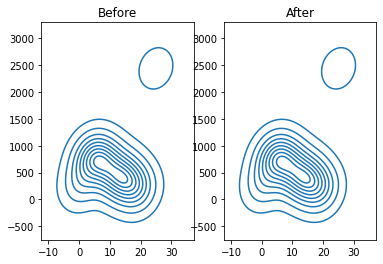

In [11]:
processed_data = fill_nan_with_median(processed_data, 'experience')

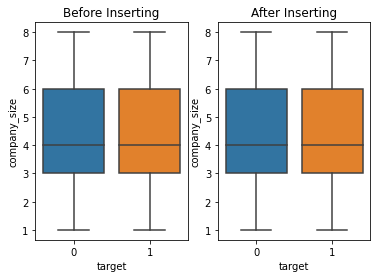

In [12]:
processed_data = fill_nan_with_probability(processed_data, 'company_size')

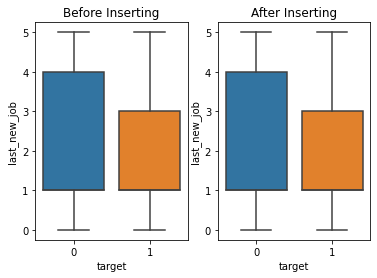

In [13]:
processed_data = fill_nan_with_probability(processed_data, 'last_new_job')

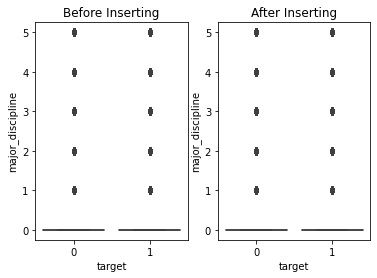

In [14]:
processed_data = fill_nan_with_probability(processed_data, 'major_discipline')

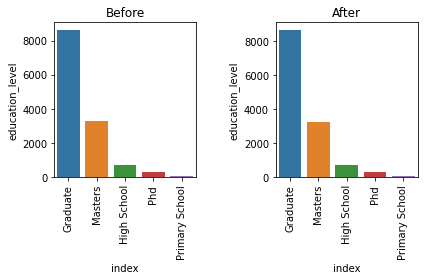

In [15]:
processed_data =  fill_nan_with_max_appear(processed_data, 'education_level')

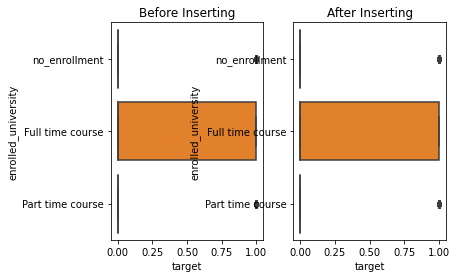

In [16]:
processed_data = fill_nan_with_probability(processed_data, 'enrolled_university')

Model Score on Self: 0.915129151291513


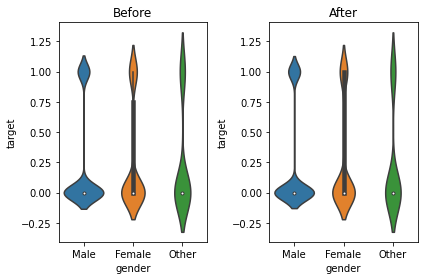

In [17]:
processed_data = fill_nan_with_knn(processed_data)

,Before,After,Difference
enrollee_id,0,0,0
city,0,0,0
city_development_index,0,0,0
gender,3639,2272,1367
relevent_experience,0,0,0
enrolled_university,311,105,206
education_level,370,56,314
major_discipline,2237,845,1392
experience,48,17,31
company_size,4779,2627,2152


Values before change  Values after change
                 <10                1.000
              Oct-49                2.000
               50-99                3.000
             100-500                4.000
             500-999                5.000
           1000-4999                6.000
           5000-9999                7.000
              10000+                8.000
Values before change  Values after change
               never                0.000
                   1                1.000
                   2                2.000
                   3                3.000
                   4                4.000
                  >4                5.000
Values before change  Values after change
                STEM                0.000
          Humanities                1.000
               Other                2.000
     Business Degree                3.000
                Arts                4.000
            No Major                5.000
Values before change Values after 

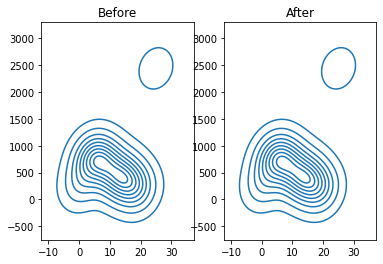

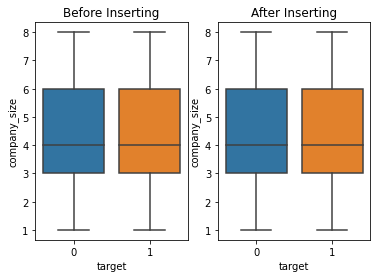

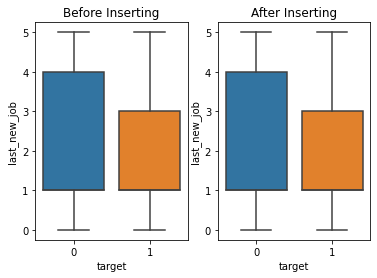

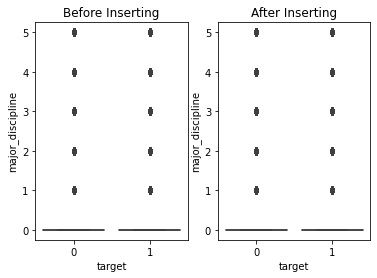

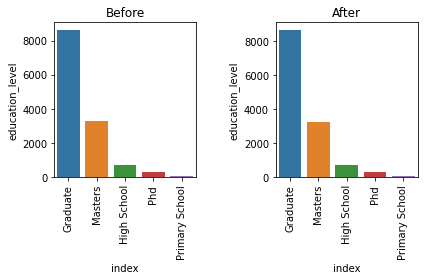

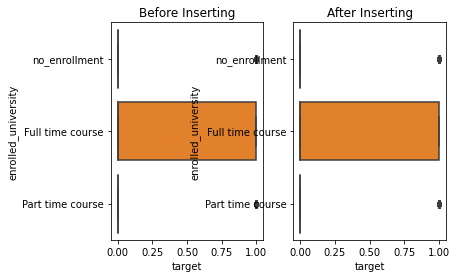

Model Score on Self: 0.8800738007380073


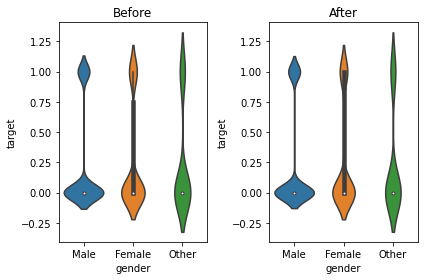

NameError: name 'logit_results' is not defined

In [18]:
from feature_extraction import *
logit_results = get_coef_vals(processed_data)['Coef']

get_qualification_index(processed_data)

In [ ]:
sns.kdeplot(processed_data['qualification_score'][processed_data['target']==1], label='target=1', color='red')
sns.kdeplot(processed_data['qualification_score'][processed_data['target']==0], label='target=0')
plt.legend()

In [ ]:
processed_data['enrolled_university'].value_counts()

In [ ]:
import statsmodels.api as sm
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
col_vars = ['relevent_experience', 'enrolled_university', 'education_level']
df = pd.get_dummies(processed_data[col_vars])
df = pd.concat([df,processed_data['experience']], axi)

In [ ]:
logit_model = sm.Logit(processed_data['target'], processed_data['experience'])
result = logit_model.fit(disp=0)
col_params = pd.concat([result.params, result.pvalues], axis=1)
col_params.columns = ['Coef', 'P-value']


In [ ]:
type(result.summary